| 컬럼            | 내용                 |
| --------------- | -------------------- |
| bathrooms       | 화장실 수            |
| bedrooms        | 침실 수              |
| listing_id      | 포스팅 DI            |
| building_id     | 건물 ID              |
| manager_id      | 포스팅 게시자 ID     |
| created         | 포스팅 된 시각(UTC?) |
| latitude        | 위도                 |
| longtitude      | 경도                 |
| price           | USD                  |
| display_address | 주소(도로명)         |
| street_address  | 번지                 |
| description     | 게시자 소개글        |
| features        | 아파트 특징 리스트   |

In [130]:
import pandas as pd
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [131]:
df = pd.read_json("./largedata/ny_apt_train.json")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [4]:
df.shape

(49352, 15)

In [5]:
df.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude                        manager_id  \
10         7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
10000      7150865   -73.9667  7533621a882f71e25173b27e3139d83d   
100004     6887163   -74.0018  d9039c43983f6e564b1482b273bd7b01   
100007     6888711   -73.9677  1067e078446a7897d2da493d2f741316   
100013     6934781   -73.9493  98e13ad4b495b9613cef886d79a6291f   

                                                   photos  price  \
10      [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
10000   [https://photos.renthop.com/2/7150865_be3306c5...   5465   
100004  [https://photos.renthop.com/2/6887163_de85c427...   2850   
100007  [https://photos.renthop.com/2/6888711_6e660cee...   3275   
100013  [https://photos.renthop.com/2/6934781_1fa4b41a...   3350   

                 street_address interest_level  
10      792 Metropolitan Avenue         medium  
10000       808 Columbus Avenue            low  
100004          241 W 13 Street           high  
100007     333 East 49th Street            low  
100013    500 West 143rd Street            low

## 결측치 처리

In [6]:
df.isna().sum()
df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [48]:
# 위도 경도 0 처리
df1 = df[df['longitude'] != 0]
df2 = df1[df1['latitude'] != 0]

# interest 
df2['interest'] = np.where(df2['interest_level'] == 'low', 0,
                         np.where(df2['interest_level'] == 'medium', 1, 2))

mean_latitude = df2.describe().loc['mean','latitude']
mean_longitude = df2.describe().loc['mean','longitude']

df2_low = df2[df2.interest == 0]
df2_mid = df2[df2.interest == 1]
df2_high = df2[df2.interest == 2]

df2_low_sample = df2_low.sample(frac=0.05)
df2_mid_sample = df2_mid.sample(frac=0.05)
df2_high_sample = df2_high.sample(frac=0.05)


import folium
map_osm = folium.Map((mean_latitude, mean_longitude), zoom_start=15)

for row in df2_low_sample.itertuples():
    map_osm.add_child(folium.Marker((row.latitude,  row.longitude),icon=folium.Icon(color='red')))
for row in df2_mid_sample.itertuples():
    map_osm.add_child(folium.Marker((row.latitude,  row.longitude),icon=folium.Icon(color='green')))
for row in df2_high_sample.itertuples():
    map_osm.add_child(folium.Marker((row.latitude,  row.longitude),icon=folium.Icon(color='blue')))

nysubway = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
long = []
lati = []
name = []
for i in range(len(nysubway)):
    long.append(list(map(float,nysubway['the_geom'][i][7:-1].split()))[0])
    lati.append(list(map(float,nysubway['the_geom'][i][7:-1].split()))[1])
    name.append(nysubway['NAME'][i])
NYS = pd.DataFrame({"NAME":name, "long":long,"lati":lati})

for row in NYS.itertuples():
    map_osm.add_child(folium.Marker((row.lati,  row.long),popup=row.NAME ,icon=folium.Icon(color='black')))
    
map_osm.save('map.html')

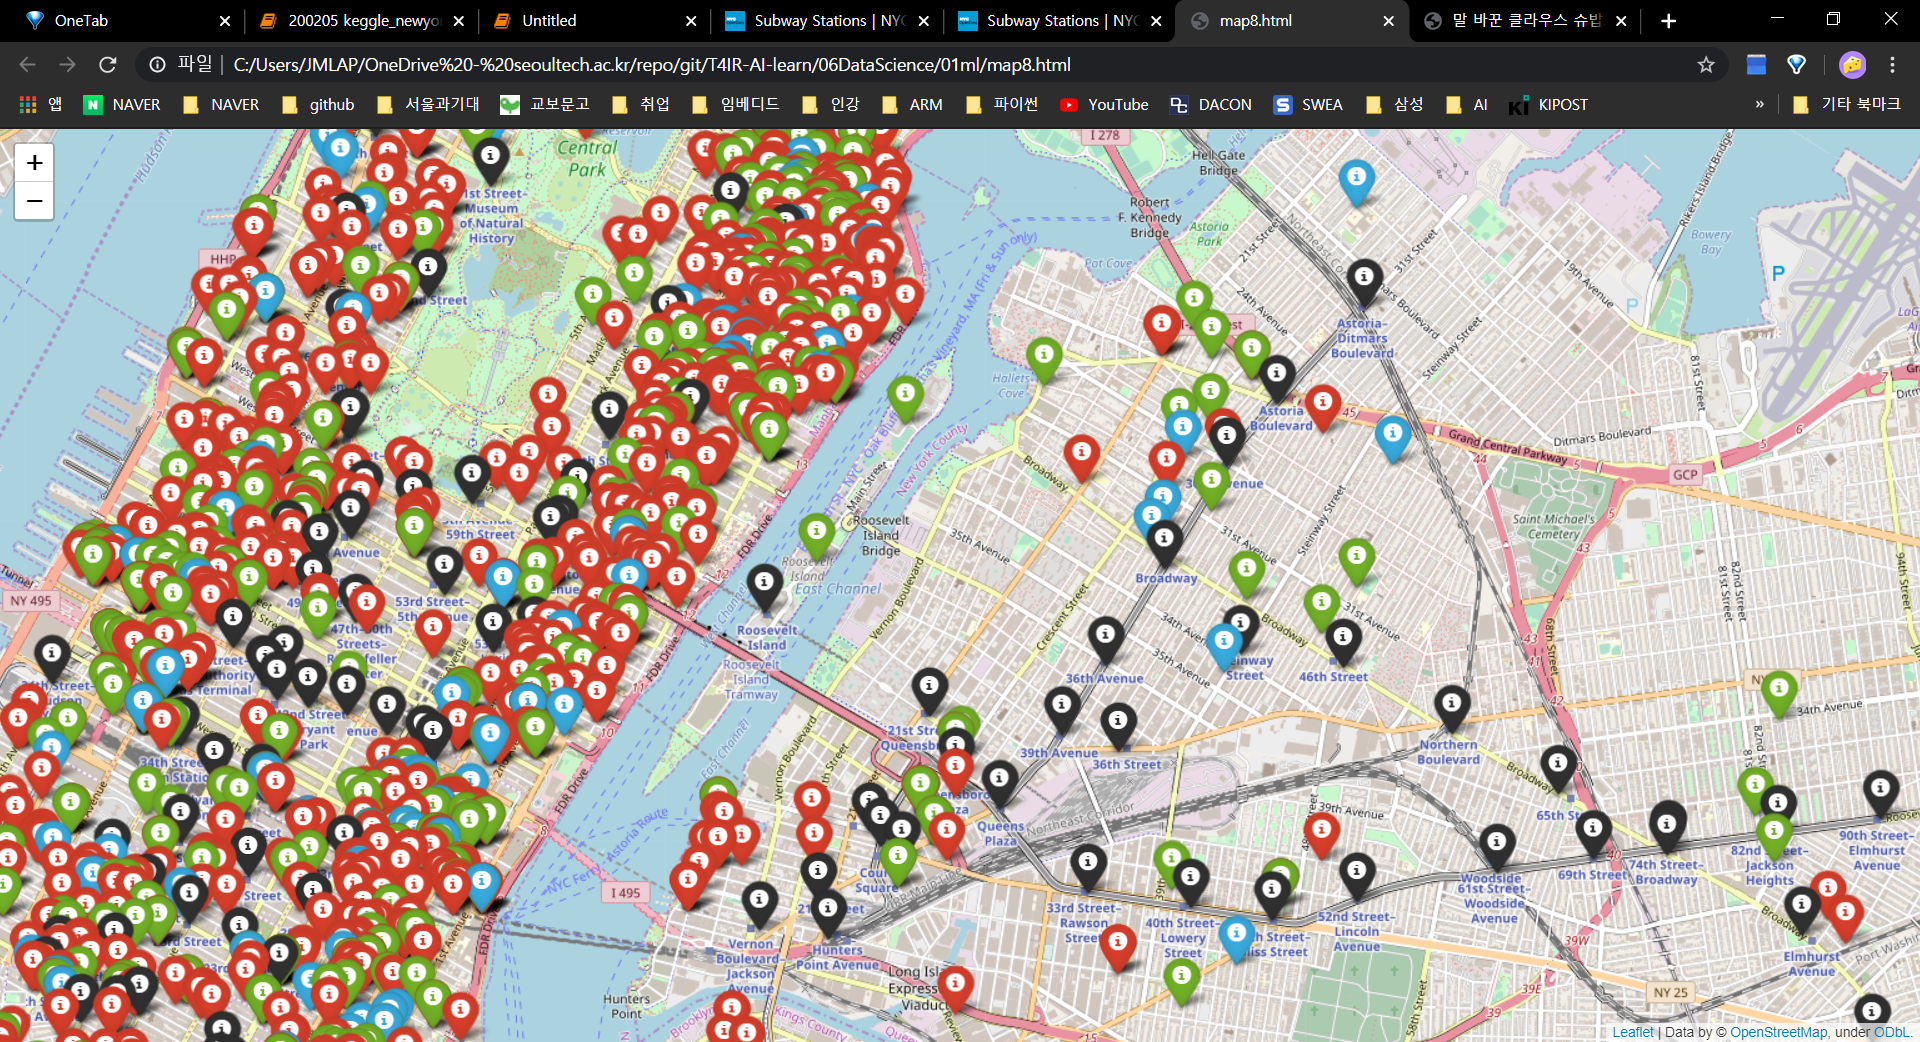

In [ ]:
import geopy.distance
coords_1 = (row.latitude, row.longitude)
coords_2 = (NYS['lati'],NYS['long'])
geopy.distance.vincenty(coords_1, coords_2).km

In [125]:
dist = []
for row in df2[['latitude','longitude']].itertuples():
    #for i in range(NYS.shape[0])
    #dist.append(min(sqrt((row.longitude - NYS['long'])**2 + (row.latitude - NYS['lati'])**2)))
    dist.append(min( (row.longitude - NYS['long'])**2 + (row.latitude - NYS['lati'])**2 )**(1/2) )
dist

NameError: name 'sqrt' is not defined

[0.001445997223055672,
 0.0037273978822753725,
 0.0012486644272252628,
 0.003823118312553386,
 0.002670392592231849,
 0.0022935016071697727,
 0.002893734057025551,
 0.0013816691265085472,
 0.0021132244131154164,
 0.0032949069651313917,
 0.005161175152545725,
 0.002593087012820295,
 0.0028003287969009423,
 0.002451004660502693,
 0.004372783736450725,
 0.007729621608041692,
 0.0014020317627206123,
 0.0013963954012280349,
 0.004543612690513276,
 0.002549946804651415,
 0.0023419220592914435,
 0.004311860251451727,
 0.007005273027544923,
 0.0011555250627855592,
 0.002750865577952718,
 0.0038857255054501783,
 0.005299237372544503,
 0.009825003025133262,
 0.004340344616299834,
 0.006369591274730845,
 0.0010782661202493385,
 0.0034981807966959835,
 0.0060407963567096585,
 0.001730922597621306,
 0.003386573910105398,
 0.0055859543326628,
 0.003336685703828939,
 0.0013434468680740893,
 0.0025886919099005743,
 0.0026083424564264835,
 0.001893052229759282,
 0.005767436192736213,
 0.003395259450856

In [99]:
0.0015199970540109575**2

2.31039104420199e-06

In [58]:
df[['longitude', 'latitude']].latitude .- NYS['lati']

SyntaxError: invalid syntax (<ipython-input-58-6694a49a9a0d>, line 1)

In [11]:
df2[df2.building_id != '0'].shape

(41056, 16)

In [17]:
df2.interest_level.value_counts()

low       34273
medium    11228
high       3839
Name: interest_level, dtype: int64

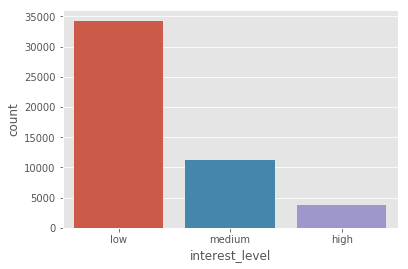

In [15]:
sns.countplot(x='interest_level', data = df, order = ['low', 'medium', 'high'])

In [31]:
df['price'].max()

4490000

In [16]:
df.groupby('interest_level').mean()

bathrooms  bedrooms   latitude    listing_id  longitude  \
interest_level                                                            
high             1.116176  1.546496  40.748007  7.017844e+06 -73.964613   
low              1.238741  1.514759  40.739504  7.026373e+06 -73.951667   
medium           1.163906  1.622050  40.745567  7.019098e+06 -73.965033   

                      price  
interest_level               
high            2700.293045  
low             4176.599142  
medium          3158.767388

In [32]:
df['interest'] = np.where(df['interest_level'] == 'low', 0,
                         np.where(df['interest_level'] == 'medium', 1, 2))

df_low = df[df.interest == 0]
df_mid = df[df.interest == 1]
df_high = df[df.interest == 2]

(array([5.000e+00, 1.238e+03, 1.464e+03, 6.760e+02, 2.630e+02, 1.250e+02,
        5.400e+01, 1.000e+01, 1.000e+00, 0.000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

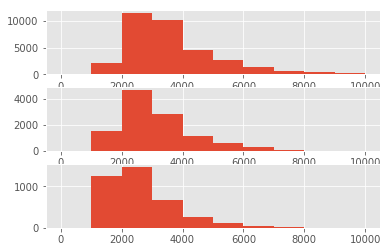

In [43]:
fig = plt.figure()
axes1 = fig.add_subplot(3, 1, 1)
axes1.hist(df_low['price'], range=(0, 10000))

axes2 = fig.add_subplot(3, 1, 2)
axes2.hist(df_mid['price'], range=(0, 10000))

axes3 = fig.add_subplot(3, 1, 3)
axes3.hist(df_high['price'], range=(0, 10000))


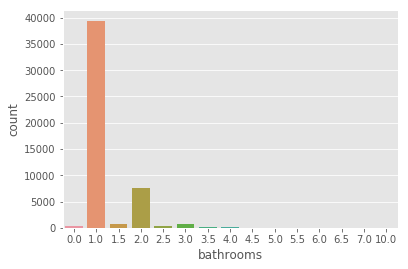

In [44]:
sns.countplot(df['bathrooms'])

In [46]:
pd.crosstab(df['bathrooms'], df['interest_level'], margins=True, normalize = True)

interest_level      high       low    medium       All
bathrooms                                             
0.0             0.000020  0.006200  0.000122  0.006342
1.0             0.069156  0.538600  0.191036  0.798792
1.5             0.000000  0.012259  0.000811  0.013069
2.0             0.008247  0.112782  0.034183  0.155212
2.5             0.000000  0.005552  0.000061  0.005613
3.0             0.000284  0.013596  0.001216  0.015096
3.5             0.000000  0.001418  0.000000  0.001418
4.0             0.000081  0.003039  0.000101  0.003222
4.5             0.000000  0.000588  0.000000  0.000588
5.0             0.000000  0.000405  0.000000  0.000405
5.5             0.000000  0.000101  0.000000  0.000101
6.0             0.000000  0.000081  0.000000  0.000081
6.5             0.000000  0.000020  0.000000  0.000020
7.0             0.000000  0.000020  0.000000  0.000020
10.0            0.000000  0.000020  0.000000  0.000020
All             0.077788  0.694683  0.227529  1.000000

In [ ]:
pd.crosstab(df['bathrooms'], df['interest_level'], normalize=True)

In [ ]:
sns.countplot(df['bedrooms'])

In [ ]:
pd.crosstab(df['bedrooms'], df['interest_level'], normalize='index')

In [ ]:
df['created'] = pd.to_datetime(df['created'])
df['year'] = df['created'].dt.year
df['month'] = df['created'].dt.month
df['day'] = df['created'].dt.day
df['week'] = df['created'].dt.week
df['hour'] = df['created'].dt.hour
df['weekday'] = df['created'].dt.weekday
df.head()

In [ ]:
pd.crosstab(df['week'], df['interest_level'], normalize = 'index')

In [ ]:
pd.crosstab(df['weekday'], df['interest_level'], normalize = 'index')

In [ ]:
pd.crosstab(df['month'], df['interest_level'], normalize='index')

In [ ]:
pd.crosstab(df['hour'], df['interest_level'], normalize = 'index')

In [ ]:
df['photos'].iloc[2]

In [ ]:
len(df['photos'].iloc[2])

In [ ]:
df['features'].iloc[2]

In [ ]:
len(df['features'].iloc[2])

In [ ]:
df['description'].iloc[2]

In [ ]:
df['description'].iloc[2].split(' ')

In [ ]:
len(df['description'].iloc[0].split(' '))

In [ ]:
df['num_photos'] = df['photos'].apply(len)
df['num_photos'].head()

In [ ]:
df['num_features'] = df['features'].apply(len)
df['num_features'].head()

In [ ]:
df['num_words'] = df['description'].apply(lambda x: len(x.split(' ')))
df['num_words'].head()

In [ ]:
pd.crosstab(df['num_photos'],df['interest_level'], normalize='index')

In [ ]:
pd.crosstab(df['num_photos'], df['interest_level'], normalize='index')[0:20]

In [ ]:
pd.crosstab(df['num_features'], df['interest_level'], normalize='index')

In [ ]:
pd.crosstab(['num_words'], df['interest_level'], normalize='index').iloc[:20]

In [ ]:
df['building_id'].head()

In [ ]:
df['building_id'].value_counts()

In [ ]:
df['building_id'].value_counts()[0:20]

### 주소

In [ ]:
df['display_address'].value_counts()

In [ ]:
df['display_address'].value_counts()[0:20]

### 좌표

In [ ]:
sns.lmplot(x='longitude', y='latitude', fit_reg = False, hue='interest_level',
          hue_order=['low', 'medium', 'high'], size=10, data = df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [ ]:
sns.lmplot(x='longitude', y='latitude', fit_reg = False, hue='interest_level',
          hue_order=['low', 'medium', 'high'], size=10, data = df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.5, -73)
plt.ylim(40.5, 41.5)

In [ ]:
df['manager_id']

In [ ]:
df['manager_id'].value_counts()

In [ ]:
top20manager = df['manager_id'].value_counts()[0:20].index
df[df['manager_id'].isin(top20manager)]

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='manager_id', hue='interest_level',
             data=df[df['manager_id'].isin(top20manager)])
plt.xlabel('Manager')
plt.ylabel('Number of advert occurrences')
plt.xticks([])

In [ ]:
df.info()

In [ ]:
df['interest'] = np.where(df['interest_level'] == 'low', 0,
                         np.where(df['interest_level'] == 'medium', 1, 2))

In [ ]:
df[['interest_level', 'interest']].head()

In [ ]:
features_to_use01 = ['bathrooms', 'bedrooms', 'latitude', 'longitude',
                    'price', 'year', 'month', 'day', 'week', 'hour', 'weekday',
                    'num_photos', 'num_features', 'num_words']

In [ ]:
X = df[features_to_use01]
X.head()

## 전처리

In [ ]:
import missingno as msno
msno.bar(df=X)

In [ ]:
X = np.array(X, dtype = 'float32')
X

In [ ]:
y = df['interest']
y.head()

In [ ]:
y = np.array(y, dtype = 'float32')
y

In [ ]:
y = y.reshape(-1,1)
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(y)

In [ ]:
y_train_onehot = enc.transform(y_train).toarray()
y_test_onehot = enc.transform(y_test).toarray()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(200,input_dim=14, activation = 'sigmoid'))
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics = ['acc'])
model.fit(X_train, y_train_onehot, epochs = 100)

In [ ]:
X_test = scaler.transform(X_test)
X_test

In [ ]:
predict = model.predict(X_test)
predict01 = np.argmax(predict, 1)
predict01
target = np.argmax(y_test_onehot, 1)
target
predict02 = (predict01 == target)
predict02

In [ ]:
pd_predict = pd.DataFrame(predict)

In [ ]:
pd_predict[pd_predict.loc[:,0].astype('int32') != 1]

In [ ]:
acc = np.sum(predict02) / len(predict02)
acc

In [ ]:
predict

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)


In [ ]:
predict01